<a href="https://colab.research.google.com/github/gffiveash/Labs/blob/main/04_hedonic_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



In [ ]:
! git clone https://github.com/gffiveash/Labs

fatal: destination path 'Labs' already exists and is not an empty directory.


In [ ]:
# Question 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Labs/04_hedonic_pricing/airbnb_hw.csv', low_memory=False)

In [ ]:
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [ ]:
print(df.shape)
print(df.columns)

(30478, 13)
Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')


In [ ]:
df=df.rename(columns={'Neighbourhood ':'Neighbourhood'})

In [ ]:
print(df.dtypes)

Host Id                         int64
Host Since                     object
Name                           object
Neighbourhood                  object
Property Type                  object
Review Scores Rating (bin)    float64
Room Type                      object
Zipcode                       float64
Beds                          float64
Number of Records               int64
Number Of Reviews               int64
Price                          object
Review Scores Rating          float64
dtype: object


In [ ]:
df['Price'].unique()

array(['145', '37', '28', '199', '549', '149', '250', '90', '270', '290',
       '170', '59', '49', '68', '285', '75', '100', '150', '700', '125',
       '175', '40', '89', '95', '99', '499', '120', '79', '110', '180',
       '143', '230', '350', '135', '85', '60', '70', '55', '44', '200',
       '165', '115', '74', '84', '129', '50', '185', '80', '190', '140',
       '45', '65', '225', '600', '109', '1,990', '73', '240', '72', '105',
       '155', '160', '42', '132', '117', '295', '280', '159', '107', '69',
       '239', '220', '399', '130', '375', '585', '275', '139', '260',
       '35', '133', '300', '289', '179', '98', '195', '29', '27', '39',
       '249', '192', '142', '169', '1,000', '131', '138', '113', '122',
       '329', '101', '475', '238', '272', '308', '126', '235', '315',
       '248', '128', '56', '207', '450', '215', '210', '385', '445',
       '136', '247', '118', '77', '76', '92', '198', '205', '299', '222',
       '245', '104', '153', '349', '114', '320', '292', '22

In [ ]:
df['Price']=pd.to_numeric(df['Price'].str.replace(',', ''), errors='coerce')

In [ ]:
print(df['Price'].dtypes)

int64


In [ ]:
df.describe()

,Host Id,Review Scores Rating (bin),Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
count,3.047800e+04,22155.000000,30344.000000,30393.000000,30478.0,30478.000000,30478.000000,22155.000000
mean,1.273171e+07,90.738659,10584.854831,1.530089,1.0,12.018735,163.589737,91.993230
std,1.190270e+07,9.059519,921.299397,1.015359,0.0,21.980703,197.785454,8.850373
min,5.000000e+02,20.000000,1003.000000,0.000000,1.0,0.000000,10.000000,20.000000
25%,2.701298e+06,85.000000,10017.000000,1.000000,1.0,0.000000,80.000000,89.000000
50%,8.551693e+06,90.000000,10065.000000,1.000000,1.0,3.000000,125.000000,94.000000
75%,2.120617e+07,100.000000,11216.000000,2.000000,1.0,13.000000,195.000000,100.000000
max,4.303307e+07,100.000000,99135.000000,16.000000,1.0,257.000000,10000.000000,100.000000


<Axes: xlabel='Price', ylabel='Count'>

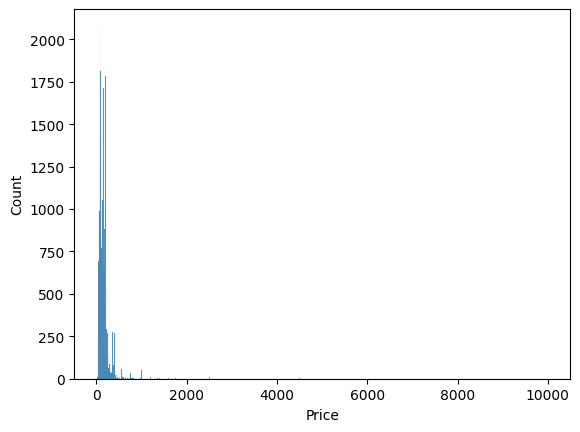

In [ ]:
sns.histplot(df['Price'])

<Axes: xlabel='Price_log', ylabel='Count'>

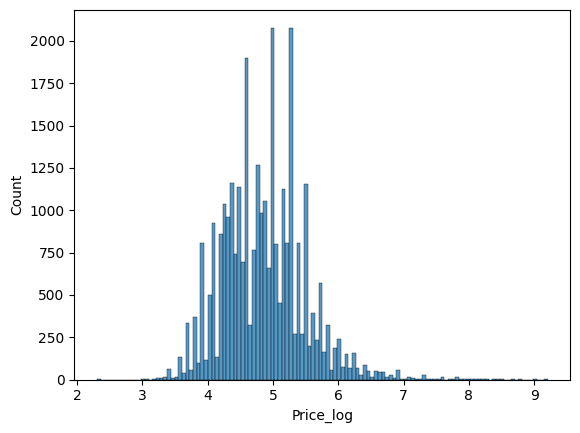

In [ ]:
df['Price_log'] = np.log(df['Price'])
sns.histplot(df['Price_log'])

<Axes: xlabel='Price_log', ylabel='Density'>

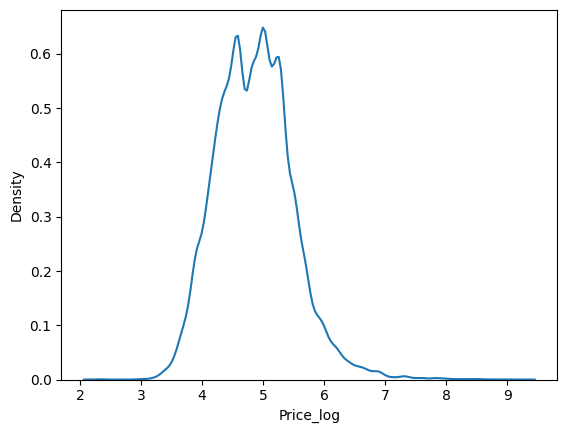

In [ ]:
sns.kdeplot(data=df,x='Price_log')

<Axes: xlabel='Review Scores Rating', ylabel='Count'>

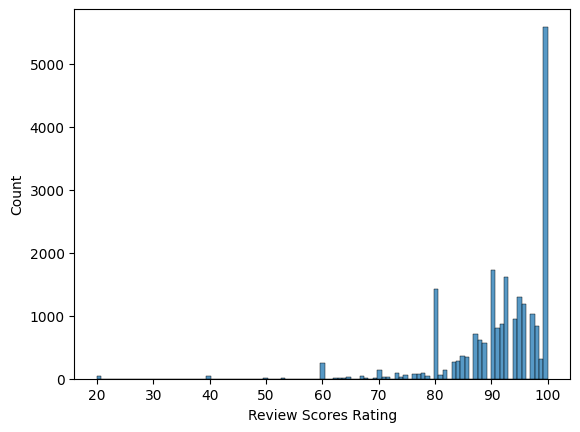

In [ ]:
sns.histplot(df['Review Scores Rating'])

<Axes: xlabel='Review Scores Rating', ylabel='Density'>

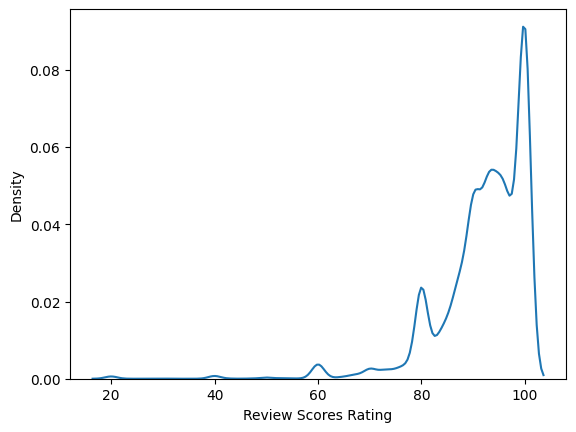

In [ ]:
sns.kdeplot(data=df,x='Review Scores Rating')

<Axes: xlabel='Price_log'>

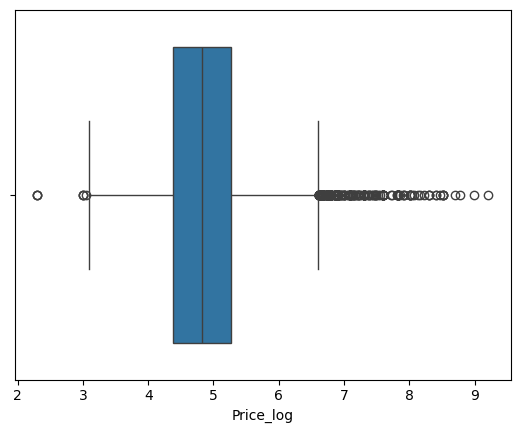

In [ ]:
sns.boxplot(data=df,x='Price_log')

<Axes: xlabel='Review Scores Rating'>

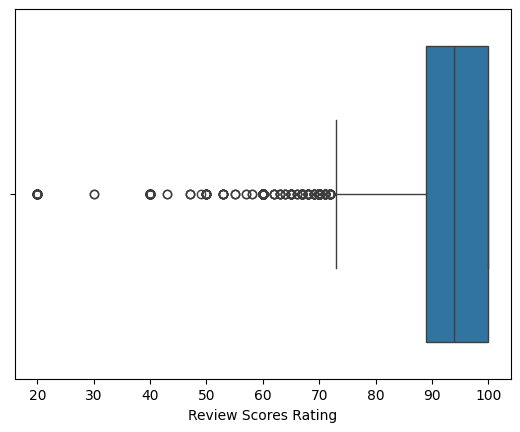

In [ ]:
sns.boxplot(data=df,x='Review Scores Rating')

<Axes: xlabel='Price_log', ylabel='Beds'>

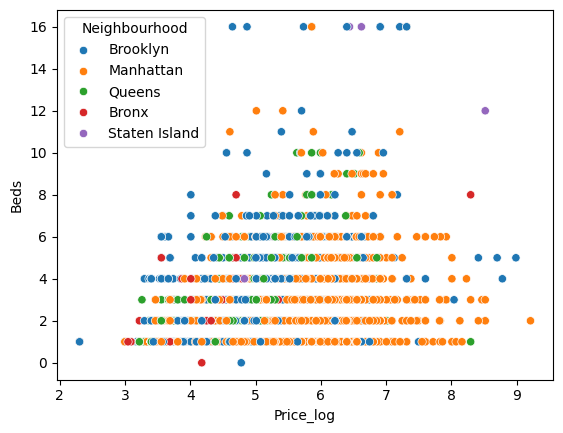

In [ ]:
sns.scatterplot(x=df['Price_log'],y=df['Beds'],hue=df['Neighbourhood'])

<Axes: xlabel='Price_log', ylabel='Review Scores Rating'>

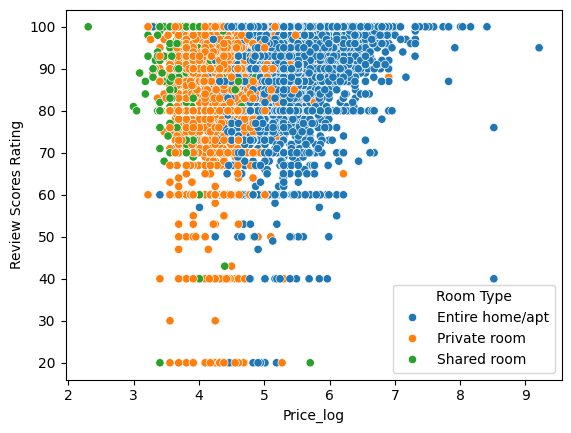

In [ ]:
sns.scatterplot(x=df['Price_log'],y=df['Review Scores Rating'],hue=df['Room Type'])

For regression, we can consider particular categorical variables, which must be turned into dummy variables, and potential explanatory/predictor variables:
  
   Dummy variables - Neighbourhood, Property Type, Room Type
   
   Predictor variables - Beds, Number of Records, Number of Reviews, Price, Review Scores Rating

In [ ]:
# Question 2: Transform your variables --- particularly
# categorical ones --- for use in your regression analysis.
from sklearn.model_selection import train_test_split
from sklearn import linear_model
X=df.loc[:,['Neighbourhood','Property Type']]
y=df['Price']
getdummies=pd.concat([pd.get_dummies(df['Neighbourhood'], dtype='int'),pd.get_dummies(df['Property Type'], dtype='int')], axis=1)

In [ ]:
# Question 3: Implement an 80/20 train-test split.
# Put the test data aside.
X_train, X_test, y_train, y_test = train_test_split(getdummies,y,test_size=.2,random_state=100)

In [ ]:
# Question 4
# Regress Price on Neighbourhood and Property Type
z_train=X_train
z_test=X_test
from sklearn.linear_model import LinearRegression
myRegression=LinearRegression(fit_intercept=False).fit(z_train,y_train)
y_hat=myRegression.predict(z_test)
residuals=y_test-y_hat
SSE=np.inner(residuals,residuals)
rsq=1-SSE/np.inner(y_test-np.mean(y_test),y_test-np.mean(y_test))
print(rsq)
rmse=np.sqrt(np.sum(SSE)/len(y_test))
print(rmse)

0.039595185917927656
225.78182951605885


In [ ]:
# Regress Review Scores Rating on Room Type and Numer of Reviews

In [ ]:
# MLG: Regress Price